# Exemplo do uso de `numpy` e `scipy`: regressão linear.

In [21]:
import numpy as np

![](images/dataregress.png)

In [22]:
x = np.array([1.0, 2.0, 3.0, 4.0, 5.0])
y = np.array([1.0, 2.1, 2.8, 4.1, 5.2])

In [23]:
%matplotlib inline

In [24]:
from matplotlib import pyplot as pl

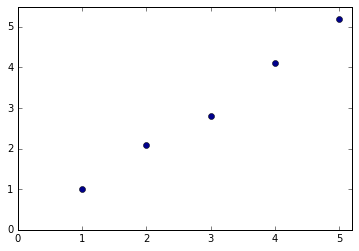

In [25]:
pl.xlim(0,5.2)
pl.ylim(0, 5.5)
p = pl.plot(x,y, 'o', color='darkblue')

![](images/scipydocs_all.png)

![](images/scipydocs_regress.png)

In [26]:
from scipy.stats import linregress

In [27]:
m, b, R, p, SEm = linregress(x, y)

- `m`: declive
- `b`: ordenada na origem
- `R`: coeficiente de correlação (de Pearson)
- `p`: p-value do teste F em que H0: y = const, independente de x
- `SEm`: erro padrão do declive

Falta calcular o SE da ordenada na origem.

In [28]:
def lin_regression(x, y):
    """Simple linear regression (y = m * x + b + error)."""
    m, b, R, p, SEm = linregress(x, y)

    # need to compute SEb, linregress only computes SEm
    n = len(x)
    SSx = np.var(x, ddof=1) * (n-1)  # this is sum( (x - mean(x))**2 )
    SEb2 = SEm**2 * (SSx/n + np.mean(x)**2)
    SEb = SEb2**0.5

    return m, b, SEm, SEb, R, p

In [29]:
m, b, Sm, Sb, R, p = lin_regression(x, y)

In [30]:
print 'm = {:>.4g} +- {:6.4f}'.format(m, Sm)
print 'b = {:>.4g} +- {:6.4f}\n'.format(b, Sb)

print 'R2 = {:7.5f}'.format(R**2)
print 'p of test F : {:<8.6f}'.format(p)

m = 1.04 +- 0.0503
b = -0.08 +- 0.1669

R2 = 0.99302
p of test F : 0.000248


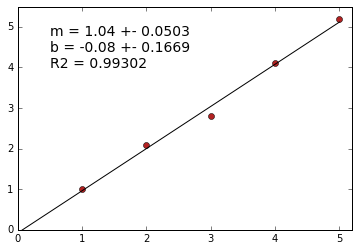

In [31]:
pl.plot(x,y, 'o', color='firebrick')
pl.xlim(0,5.2)
pl.ylim(0, 5.5)

# desenho da recta, dados 2 pontos extremos
# escolhemos a origem e o max(x)
x2 = np.array([0, max(x)])

pl.plot(x2, m * x2 + b, '-k')

# Anotação sobre o gráfico:
ptxt = 'm = {:>.4g} +- {:6.4f}\nb = {:>.4g} +- {:6.4f}\nR2 = {:7.5f}'

t = pl.text(0.5, 4, ptxt.format(m, Sm, b, Sb, R**2), fontsize=14)